https://towardsdatascience.com/machine-learning-classifier-evaluation-using-roc-and-cap-curves-7db60fe6b716

# Importing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


# Data Preprocessing

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(300, 2) (300,) (100, 2) (100,)


In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(300, 2) (300,) (100, 2) (100,)


## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Building Models

## Fitting classifier to the Training set

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

classifier = LogisticRegression(random_state = 0)
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
probs = classifier.predict_proba(X_test)  # https://www.codeprj.com/zh/blog/8fd20f1.html
probs = probs[:, 1] # Reading probability of second class


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[65  3]
 [ 8 24]]


## Model Performance

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)


Accuracy :  89.0


# Metrics of Classification

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
def accuracy(actual, preds):

    return np.sum(preds == actual)/len(actual)


In [ ]:
def precision(actual, preds):

    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    pred_pos = (preds==1).sum()
    return tp/pred_pos
    

In [ ]:
def recall(actual, preds):

    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    act_pos = (actual==1).sum()
    return tp/act_pos


In [ ]:
def f1(preds, actual):

    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    pred_pos = (preds==1).sum()
    prec = tp/(pred_pos)
    act_pos = (actual==1).sum()
    recall = tp/act_pos
    return 2*prec*recall / (prec+recall)
    

In [ ]:
def print_metrics(y_true, preds):

   print('Accuracy score: ', format(accuracy_score(y_true, preds)))
   print('Precision score: ', format(precision_score(y_true, preds)))
   print('Recall score: ', format(recall_score(y_true, preds)))
   print('F1 score: ', format(f1_score(y_true, preds)))
   print('\n')
   

In [ ]:
print_metrics(y_test, y_pred)


Accuracy score:  0.89
Precision score:  0.8888888888888888
Recall score:  0.75
F1 score:  0.8135593220338982




# Receiver Operating Characteristic (ROC) Curve

## Import files and create base line

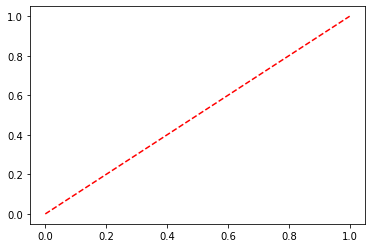

In [6]:
from sklearn.metrics import roc_curve, auc

plt.plot([0,1], [0,1], 'r--')


## Calculate probabilities and determine TPR and FPR

In [9]:
probs = classifier.predict_proba(X_test)
probs = probs[:, 1] # Reading probability of second class
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)


## Plot the ROC Curve

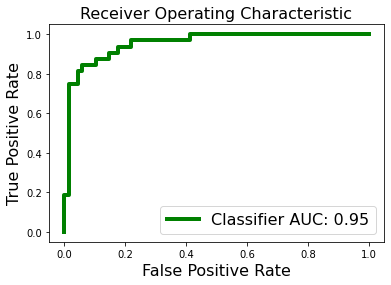

In [10]:
label = 'Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)


## Integration

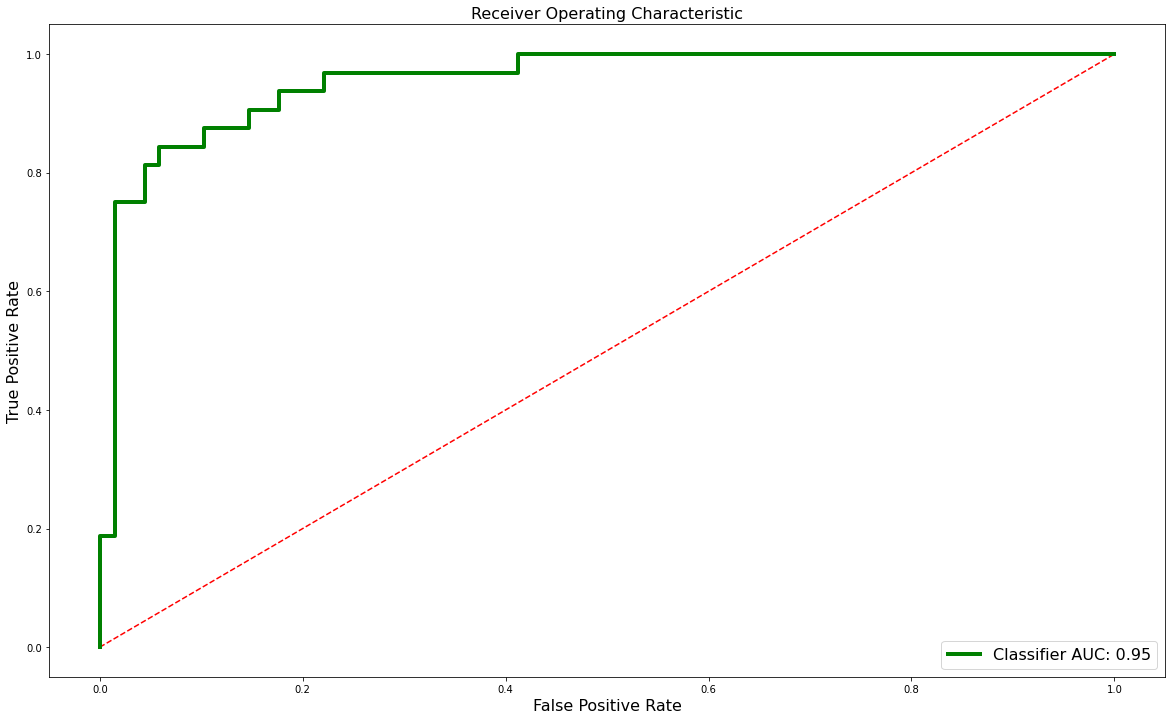

In [11]:
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

label = 'Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)


# Cumulative Accuracy Profile (CAP) Curve

## Code : Random Model

100 32 68


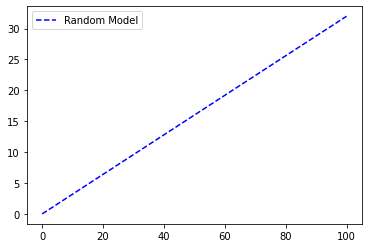

In [16]:
# length of the test data
total = len(y_test)
 
# Counting '1' labels in test data
one_count = np.sum(y_test)
 
# counting '0' labels in test data
zero_count = total - one_count
 
# x-axis ranges from 0 to total test data
# y-axis ranges from 0 to the total positive outcomes.
 
plt.plot([0, total], [0, one_count], c = 'b', linestyle = '--', label = 'Random Model')
plt.legend()

print(total, one_count, zero_count)


## Code : Classifier Line

[(0.9960511419858186, 1), (0.9949603034893907, 1), (0.9902095498729606, 1), (0.9886004719093656, 1), (0.9816217244976375, 1), (0.9807976289036457, 1), (0.9775196560017058, 0), (0.9729556927270846, 1), (0.963318652525834, 1), (0.9345147940641574, 1), (0.9321796542485768, 1), (0.9281155889661853, 1), (0.8926518768489462, 1), (0.8886521294968083, 1), (0.8821203657651151, 1), (0.8596460894720325, 1), (0.8501092529545244, 1), (0.8046104888501628, 1), (0.7817512880668561, 1), (0.7322090777422188, 1), (0.7233333962688545, 1), (0.7215523932851176, 1), (0.5929966363795973, 1), (0.5505270769200095, 1), (0.5447771158892839, 1), (0.5367830607091236, 0), (0.5042045585637001, 0), (0.4863214220862674, 1), (0.4751623796139299, 1), (0.4644796802645683, 0), (0.43703032993696034, 1), (0.41691091985759926, 0), (0.41605227419692253, 0), (0.4030710988925199, 0), (0.39108870080782554, 1), (0.3695931536377607, 0), (0.33852117993618186, 0), (0.3349373468065355, 0), (0.3211259120362306, 1), (0.29970380182438017

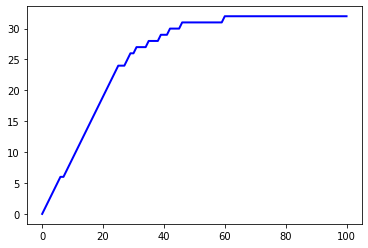

In [24]:
probs = classifier.predict_proba(X_test)
probs = probs[:, 1] # Reading probability of second class

lm = [y for _, y in sorted(zip(probs, y_test), reverse = True)] # for _: Ignore the index
x_values = np.arange(0, total + 1)
y_values = np.append([0], np.cumsum(lm))
plt.plot(x_values, y_values, c = 'b', label = 'classifier', linewidth = 2)

print(sorted(zip(probs, y_test), reverse = True))
print(y_values)

## Code : Perfect Model

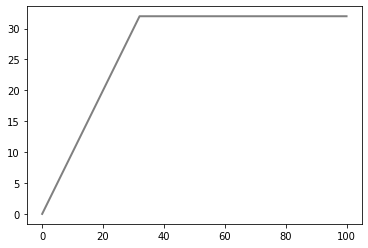

In [14]:
plt.plot([0, one_count, total], [0, one_count, one_count], c = 'grey', linewidth = 2, label = 'Perfect Model')


## Integration

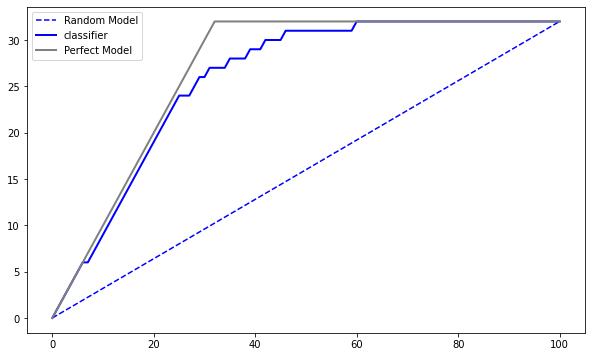

In [15]:
plt.figure(figsize = (10, 6))
plt.plot([0, total], [0, one_count], c = 'b', linestyle = '--', label = 'Random Model')
plt.plot(x_values, y_values, c = 'b', label = 'classifier', linewidth = 2)
plt.plot([0, one_count, total], [0, one_count, one_count], c = 'grey', linewidth = 2, label = 'Perfect Model')
plt.legend()


## Accuracy Ratio

In [18]:
# Area under Random Model
a = auc([0, total], [0, one_count])

# Area between Perfect and Random Model
aP = auc([0, one_count, total], [0, one_count, one_count]) - a

# Area between Trained and Random Model
aR = auc(x_values, y_values) - a

print("Accuracy Rate for Classifier: {}".format(aR / aP))


Accuracy Rate for Classifier: 0.9080882352941176


96.875


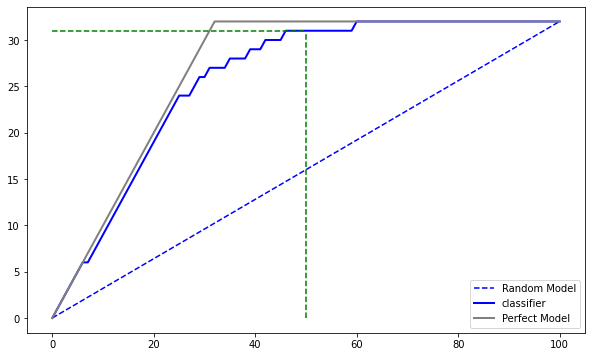

In [21]:
plt.figure(figsize = (10, 6))
plt.plot([0, total], [0, one_count], c = 'b', linestyle = '--', label = 'Random Model')
plt.plot(x_values, y_values, c = 'b', label = 'classifier', linewidth = 2)
plt.plot([0, one_count, total], [0, one_count, one_count], c = 'grey', linewidth = 2, label = 'Perfect Model')
plt.legend()

# Point where vertical line will cut trained model
index = int((50*total / 100))

## 50% Verticcal line from x-axis
plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

class_1_observed = y_values[index] * 100 / max(y_values)
print(class_1_observed)

# Visualising the results

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


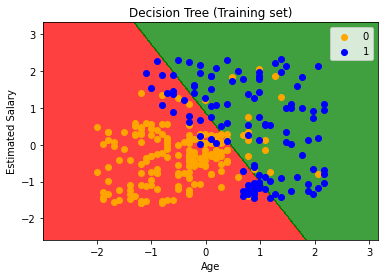

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


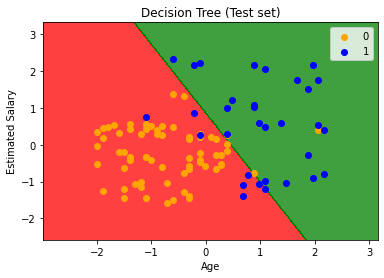

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Decision Tree (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
